In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [107]:
# import dataset
df = pd.read_csv('AmesHousing.csv')

In [108]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [109]:
# drop 'Order' column (repeat of index)
df = df.drop('Order', axis=1)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Target variable is slightly right skewed. Can take log(y) to normalize, but will lose direct interpretability of evaluation metrics. Proceed for now and if residuals are not random and normally distributed, circle back and re-run with log(y).

/Users/danki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

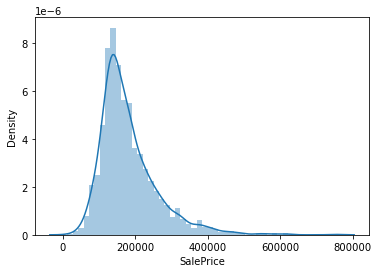

In [121]:
sns.distplot(df['SalePrice'])

##### Cyclicality observed in home sales.

In [111]:
df['YrMo'] = df[['Yr Sold', 'Mo Sold']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
df['YrMo'] = sorted(pd.to_datetime(df.YrMo).dt.to_period('M'))

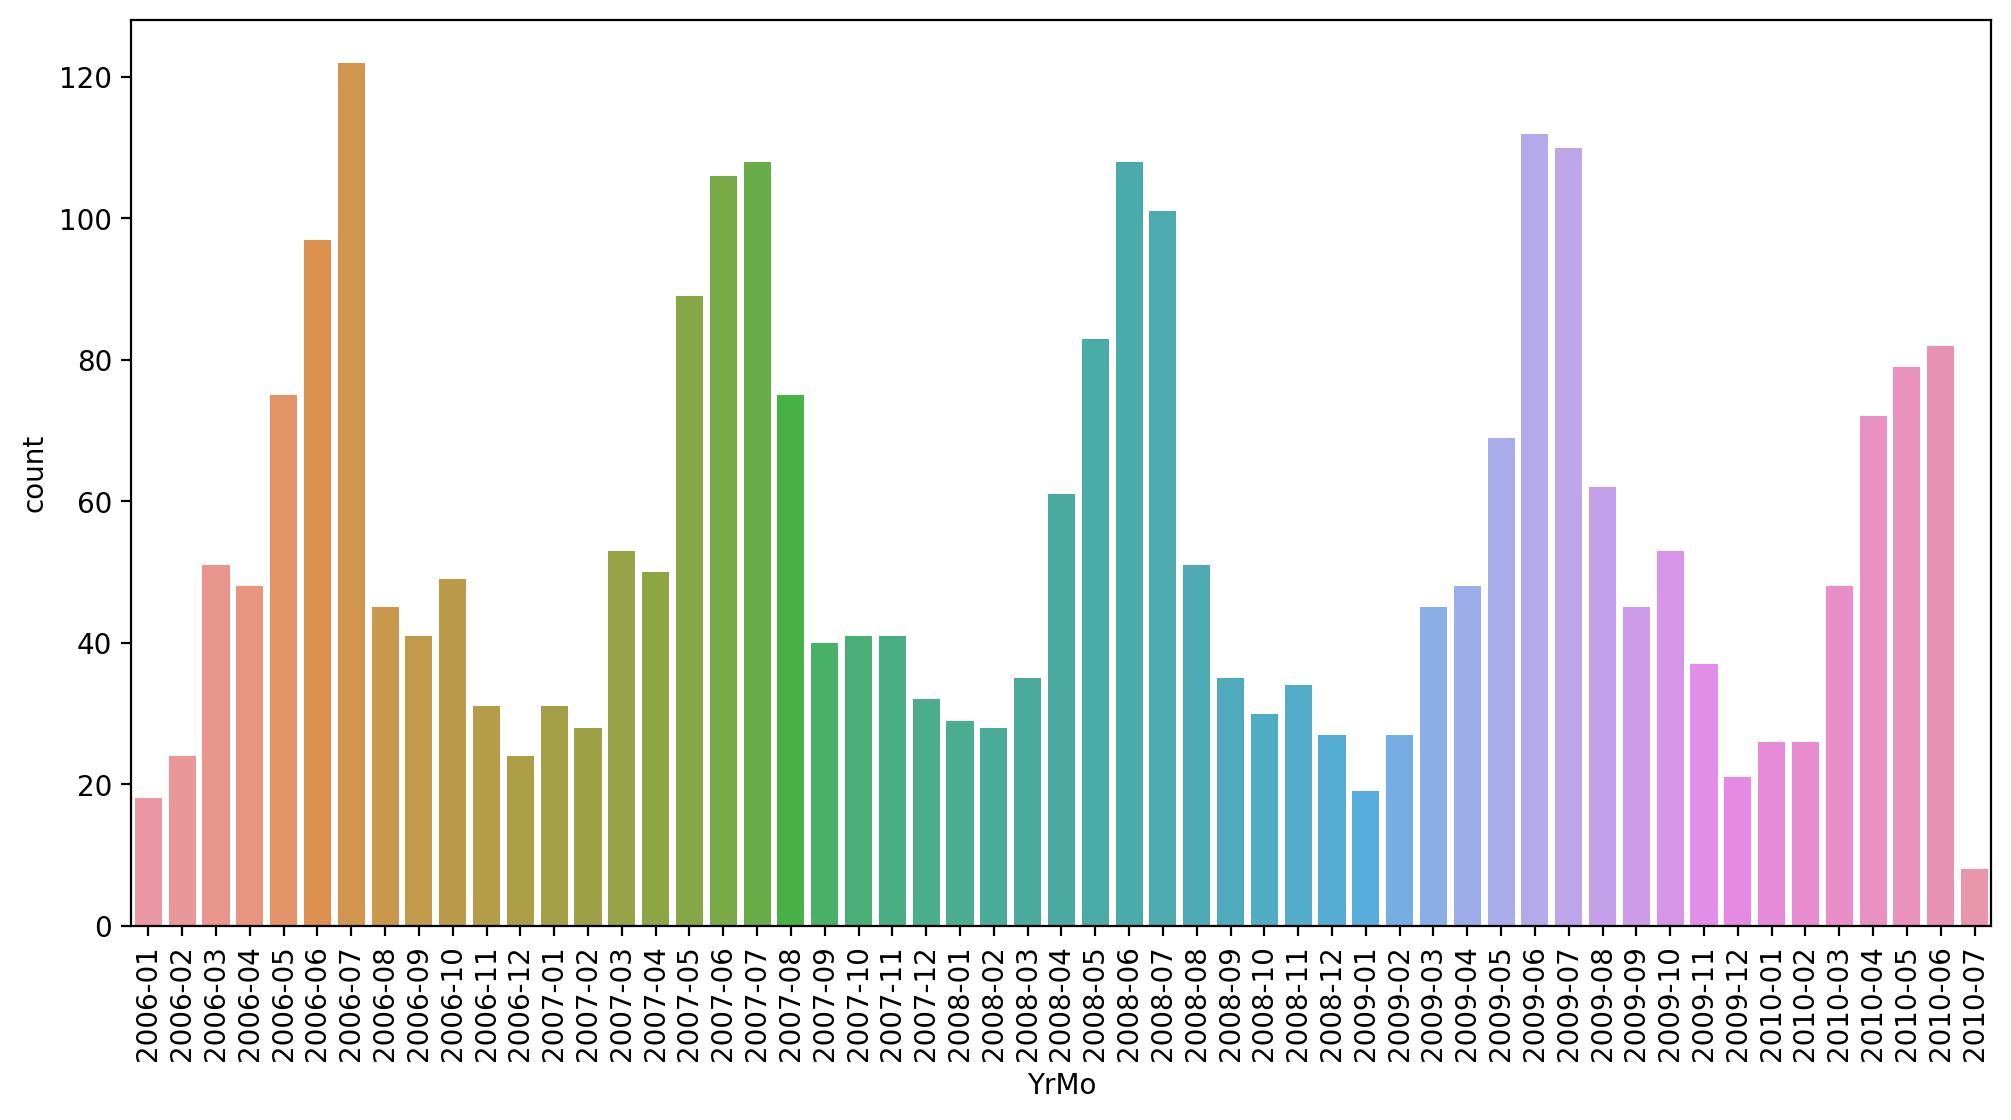

In [112]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(x='YrMo', data=df)
plt.xticks(rotation=90);

##### Median Sale Price by Neighborhood

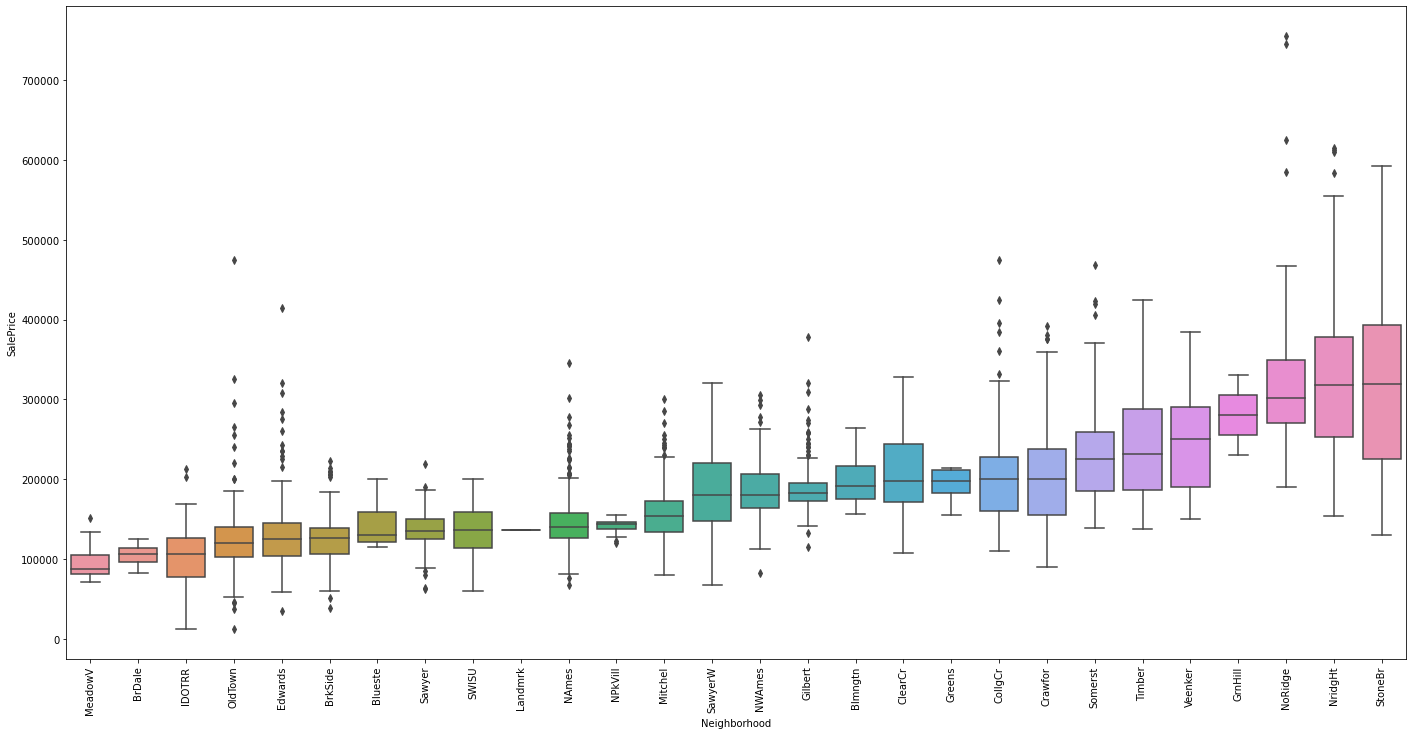

In [113]:
order_idx = df.groupby('Neighborhood').agg({'SalePrice':'median'}).sort_values('SalePrice').index
plt.figure(figsize=(24,12))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=order_idx)
plt.xticks(rotation=90);

##### Overall Condition vs Sale Price

<AxesSubplot:xlabel='Overall Cond', ylabel='SalePrice'>

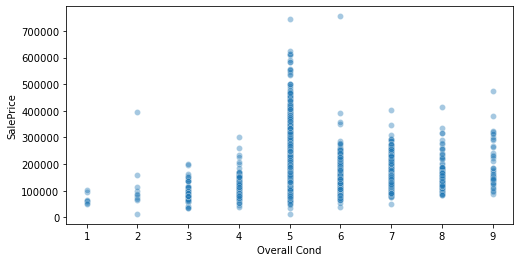

In [114]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Overall Cond', y='SalePrice', data=df, alpha=0.4)

##### Year Built vs Sale Price

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

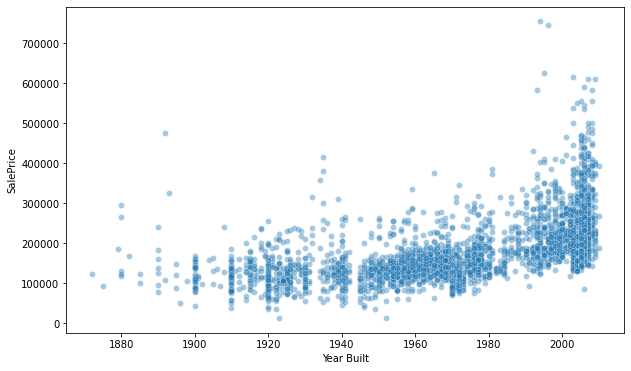

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year Built', y='SalePrice', data=df, alpha=0.4)

##### Foundation Condition vs Sale Price

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

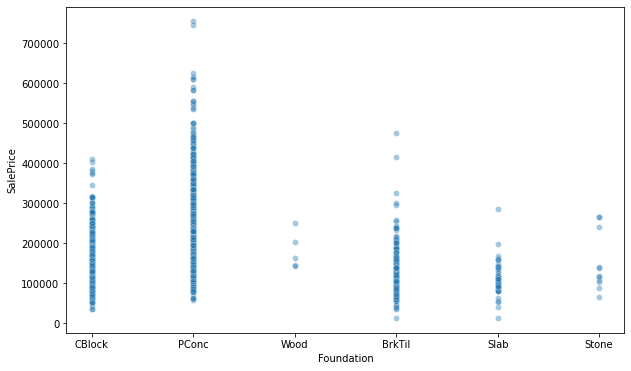

In [117]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Foundation', y='SalePrice', data=df, alpha=0.4)

##### Year Remodeled vs Sale Price

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

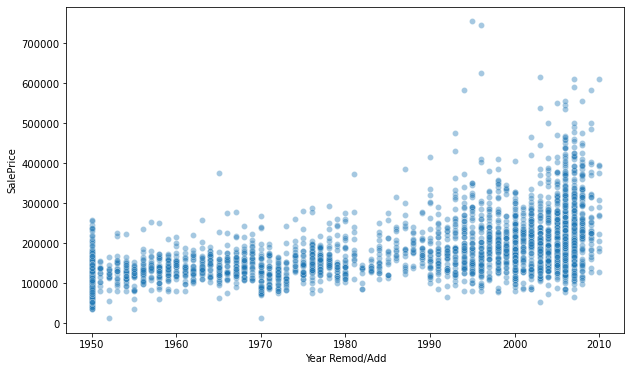

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Year Remod/Add', y='SalePrice', data=df, alpha=0.4)

##### Overall Quality vs Sale Price

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

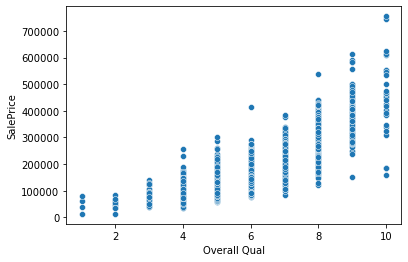

In [122]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

Outliers observed for high Overall Qual, but relatively low SalePrice.

In [28]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Note that index 1498, 2180, 2181 are outliers in both Gr Liv Area (see below) and Overall Qual.

Safe to drop these indices.

In [129]:
idx_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [130]:
df = df.drop(idx_drop)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

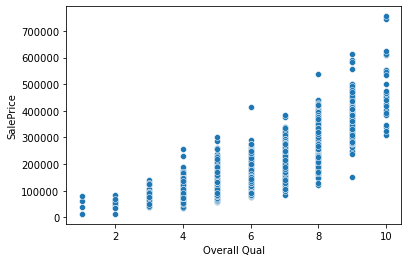

In [131]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

##### Correlation Heat Map

<AxesSubplot:>

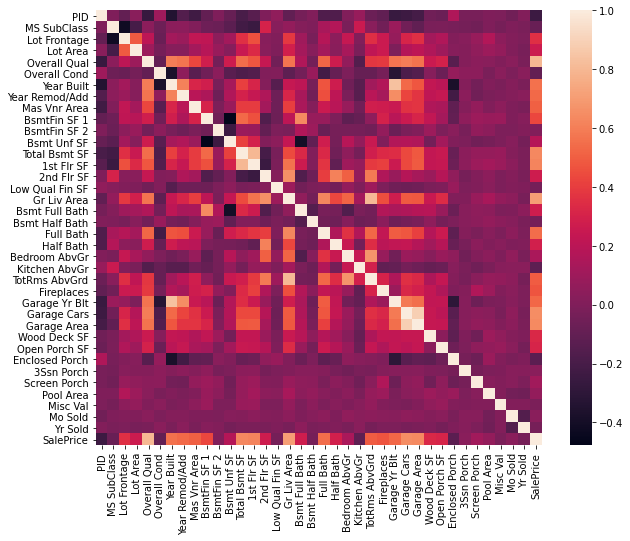

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

Overall Qual is most highly correlated with SalePrice.

In [120]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

##### Gross Living Area vs Sale Price

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

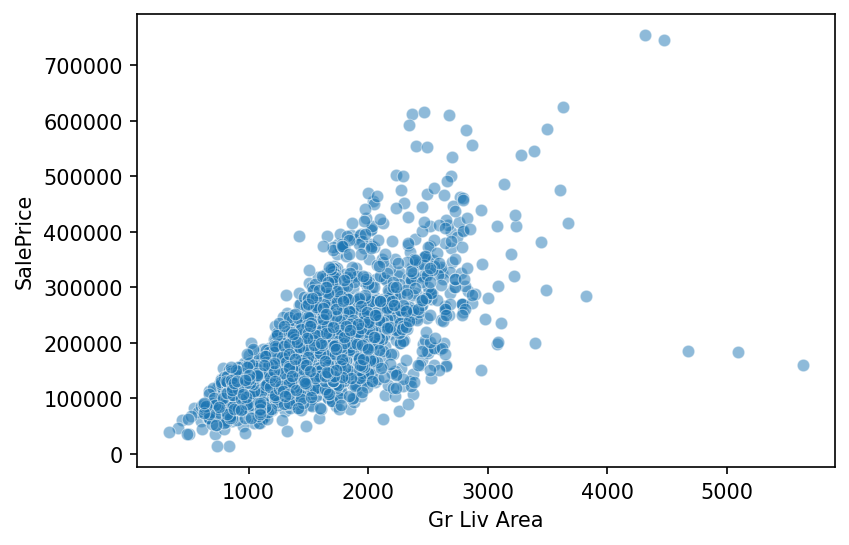

In [127]:
plt.figure(dpi=150)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, alpha=0.5)

Outliers observed for high Gr Liv Area, but relatively low SalePrice.

There may be more outliers, but these three points were visually apparent. Removing these outliers will substantially improve the performance of regression tasks.

In [128]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YrMo
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,2008-05
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,Elev,17000,10,2007,New,Partial,183850,2009-06
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,2009-06


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

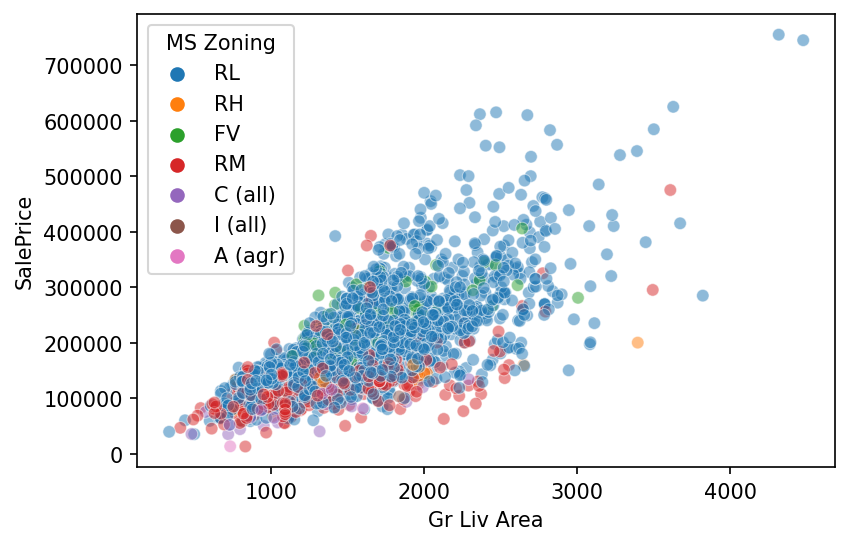

In [134]:
plt.figure(dpi=150)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, alpha=0.5, hue='MS Zoning')

### Missing Data

In [135]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
YrMo                0
Length: 82, dtype: int64

Remove PID unique identifier since we have an index from the df.

In [136]:
df = df.drop('PID', axis=1)

In [138]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
YrMo                0
Length: 81, dtype: int64

Percentage missing excluding columns with no missing data:

In [143]:
def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [144]:
percent_nan = percent_missing(df)

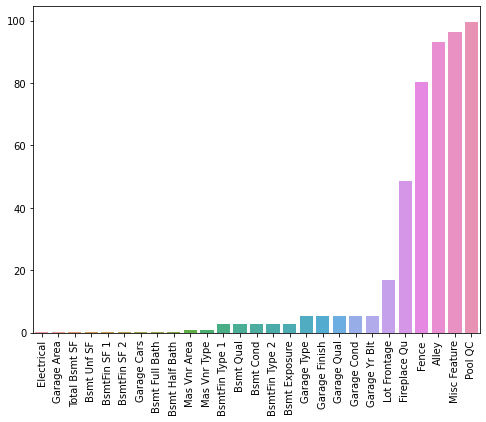

In [147]:
plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

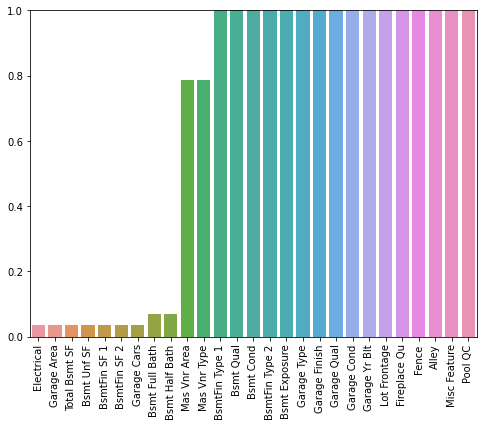

In [149]:
# set 1% threshold
plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [151]:
1/len(df) * 100

0.0341646737273659

In [152]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [153]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YrMo
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000,2008-01


In [155]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YrMo
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000,2008-01
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2008,WD,Normal,284700,2008-05


Fill in numerical features columns with 0, assuming missing data implies no basement.

In [156]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Similar logic for categorical basement features.

In [157]:
bsmt_cat_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [159]:
# recalculate percent_nan
percent_nan = percent_missing(df)

(0.0, 1.0)

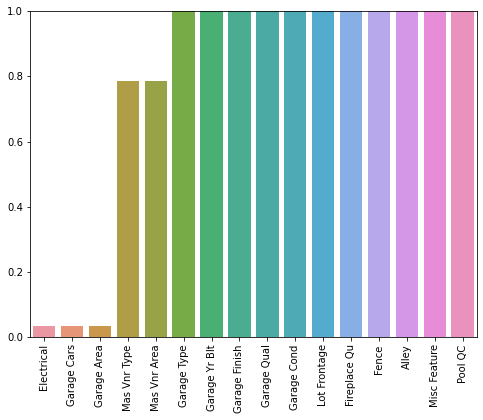

In [160]:
plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [161]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YrMo
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909,2009-06


In [162]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YrMo
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909,2009-06


Assume missing garage features for this row implies no garage. Fill NA with 0.

In [163]:
garage_num_cols = ['Garage Cars', 'Garage Area']
df[garage_num_cols] = df[garage_num_cols].fillna(0)

Drop 1 row of missing Electrical feature.

In [165]:
df = df.dropna(axis=0, subset=['Electrical'])

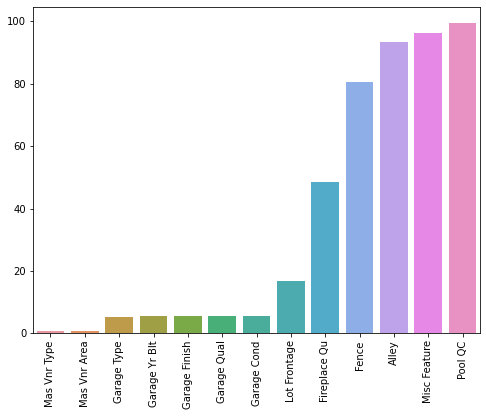

In [167]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

Missing masonry veneer type most likely indicates that the house does not have a masonry veneer. Fill NA accordingly.

In [168]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

<ipython-input-168-4128cfebb778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
<ipython-input-168-4128cfebb778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")


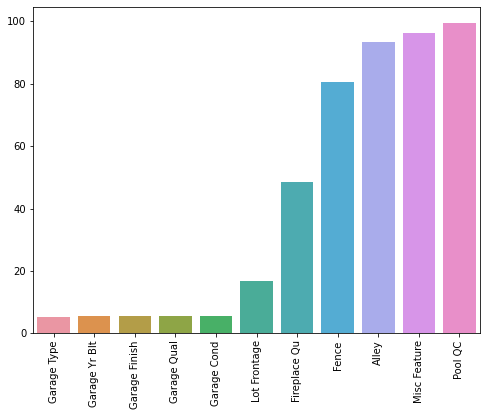

In [169]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

Based on the feature description, missing garage data likely to indicate no garage. Fill NA accordingly.

In [176]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA
2926,Attchd,1983.0,Unf,TA,TA
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,1975.0,RFn,TA,TA


In [179]:
gar_cat_cols = ['Garage Type', 'Garage Finish',
                'Garage Qual', 'Garage Cond']
df[gar_cat_cols] = df[gar_cat_cols].fillna('None')

/Users/danki/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [180]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

<ipython-input-180-86d2f24c5995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


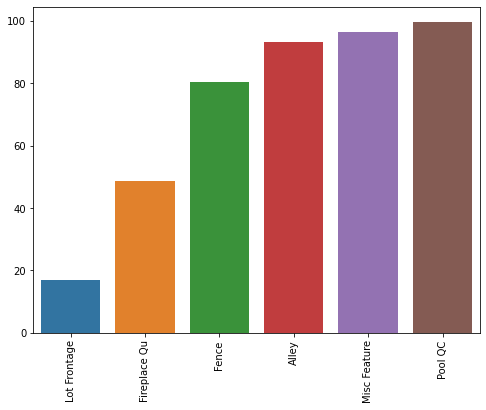

In [181]:
percent_nan = percent_missing(df)

plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [184]:
percent_nan

Lot Frontage    16.746411
Fireplace Qu    48.564593
Fence           80.451128
Alley           93.233083
Misc Feature    96.411483
Pool QC         99.589884
dtype: float64

Drop Fence, Alley, Misc Feature, and Pool QC. While these missing features likely indicate that the feature does not exist for the house, features missing a substantial amount of data are unlikely to provide predictive value.

In [185]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1)

Fill NA for Fireplace Qu with 'None'.

In [188]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

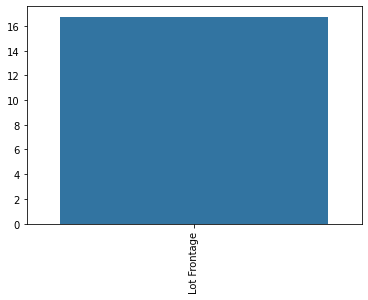

In [189]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

Impute missing data for Lot Frontage. Lot Frontage describes the linear feet of street connected to the property.

Assume that Lot Frontage depends on which neighborhood a house is in.

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

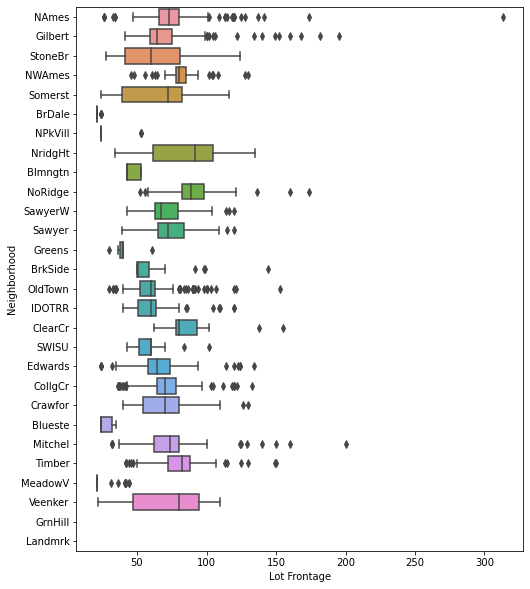

In [192]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df)

In [193]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [194]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

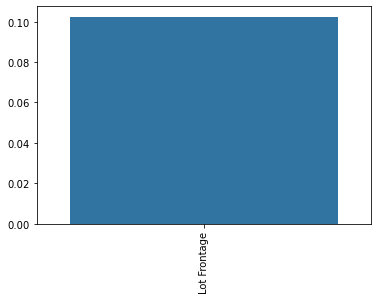

In [195]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [196]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [197]:
percent_nan = percent_missing(df)

No missing data.

In [198]:
percent_nan

Series([], dtype: float64)

## Dummify Categorical Data

In [200]:
# MS Subclass is a categorical feature. Convert to string.
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2926 non-null   object 
 1   MS Zoning        2926 non-null   object 
 2   Lot Frontage     2926 non-null   float64
 3   Lot Area         2926 non-null   int64  
 4   Street           2926 non-null   object 
 5   Lot Shape        2926 non-null   object 
 6   Land Contour     2926 non-null   object 
 7   Utilities        2926 non-null   object 
 8   Lot Config       2926 non-null   object 
 9   Land Slope       2926 non-null   object 
 10  Neighborhood     2926 non-null   object 
 11  Condition 1      2926 non-null   object 
 12  Condition 2      2926 non-null   object 
 13  Bldg Type        2926 non-null   object 
 14  House Style      2926 non-null   object 
 15  Overall Qual     2926 non-null   int64  
 16  Overall Cond     2926 non-null   int64  
 17  Year Built    

In [219]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [220]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2926 non-null   float64
 1   Lot Area         2926 non-null   int64  
 2   Overall Qual     2926 non-null   int64  
 3   Overall Cond     2926 non-null   int64  
 4   Year Built       2926 non-null   int64  
 5   Year Remod/Add   2926 non-null   int64  
 6   Mas Vnr Area     2926 non-null   float64
 7   BsmtFin SF 1     2926 non-null   float64
 8   BsmtFin SF 2     2926 non-null   float64
 9   Bsmt Unf SF      2926 non-null   float64
 10  Total Bsmt SF    2926 non-null   float64
 11  1st Flr SF       2926 non-null   int64  
 12  2nd Flr SF       2926 non-null   int64  
 13  Low Qual Fin SF  2926 non-null   int64  
 14  Gr Liv Area      2926 non-null   int64  
 15  Bsmt Full Bath   2926 non-null   float64
 16  Bsmt Half Bath   2926 non-null   float64
 17  Full Bath     

In [221]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2926 non-null   object
 1   MS Zoning       2926 non-null   object
 2   Street          2926 non-null   object
 3   Lot Shape       2926 non-null   object
 4   Land Contour    2926 non-null   object
 5   Utilities       2926 non-null   object
 6   Lot Config      2926 non-null   object
 7   Land Slope      2926 non-null   object
 8   Neighborhood    2926 non-null   object
 9   Condition 1     2926 non-null   object
 10  Condition 2     2926 non-null   object
 11  Bldg Type       2926 non-null   object
 12  House Style     2926 non-null   object
 13  Roof Style      2926 non-null   object
 14  Roof Matl       2926 non-null   object
 15  Exterior 1st    2926 non-null   object
 16  Exterior 2nd    2926 non-null   object
 17  Mas Vnr Type    2926 non-null   object
 18  Exter Qu

In [222]:
df_objs = df_objs.drop('YrMo', axis=1)

In [223]:
df_objs = pd.get_dummies(df_objs, drop_first=True)

In [224]:
final_df = pd.concat([df_nums, df_objs], axis=1)

In [225]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [227]:
final_df.to_csv('AmesHousing_final.csv', index=False)